In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# 设置全局字体为 Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# 启用 LaTeX 渲染
plt.rcParams['text.usetex'] = True

from matplotlib.legend_handler import HandlerLine2D
from matplotlib.legend_handler import HandlerTuple

# 定义图例处理器
class ColorLineStyleHandler(HandlerLine2D):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        # 获取线条的颜色、样式和标签
        color = orig_handle.get_color()
        linestyle = orig_handle.get_linestyle()
        label = orig_handle.get_label()

        # 创建一个新的 Line2D 对象，设置线条的颜色、样式和标签，并添加文本标注
        line = plt.Line2D([0, width], [height // 2, height // 2],
                         linestyle=linestyle, color=color, linewidth=2)
        return [line]

r_50 = loadmat('r_50.mat')['r_50'].flatten()
r_50_Delta_5 = loadmat('r_50_Delta_5.mat')['r_50_Delta_5'].flatten()
r_100 = loadmat('r_100.mat')['r_100'].flatten()
r_100_Delta_5 = loadmat('r_100_Delta_5.mat')['r_100_Delta_5'].flatten()
r_200 = loadmat('r_200.mat')['r_200'].flatten()
r_200_Delta_5 = loadmat('r_200_Delta_5.mat')['r_200_Delta_5'].flatten()
r_500 = loadmat('r_500.mat')['r_500'].flatten()
r_500_Delta_5 = loadmat('r_500_Delta_5.mat')['r_500_Delta_5'].flatten()

In [20]:
dt = np.array([0.005, 0.008, 0.010, 0.012, 0.015, 0.017, 0.020])
dt_new = np.linspace(min(dt), max(dt), 100)

# 多项式拟合
coefficients_r_50 = np.polyfit(dt, r_50, 3) 
poly_r_50 = np.poly1d(coefficients_r_50)
coefficients_r_5_Delta_5 = np.polyfit(dt, r_50_Delta_5, 3) 
poly_r_50_Delta_5 = np.poly1d(coefficients_r_5_Delta_5)

coefficients_r_100 = np.polyfit(dt, r_100, 3)  
poly_r_100 = np.poly1d(coefficients_r_100)
coefficients_r_100_Delta_5 = np.polyfit(dt, r_100_Delta_5, 3)  
poly_r_100_Delta_5 = np.poly1d(coefficients_r_100_Delta_5)

coefficients_r_200 = np.polyfit(dt, r_200, 3) 
poly_r_200 = np.poly1d(coefficients_r_200)
coefficients_r_200_Delta_5 = np.polyfit(dt, r_200_Delta_5, 3) 
poly_r_200_Delta_5 = np.poly1d(coefficients_r_200_Delta_5)

coefficients_r_500 = np.polyfit(dt, r_500, 3) 
poly_r_500 = np.poly1d(coefficients_r_500)
coefficients_r_500_Delta_5 = np.polyfit(dt, r_500_Delta_5, 3)  
poly_r_500_Delta_5 = np.poly1d(coefficients_r_500_Delta_5)

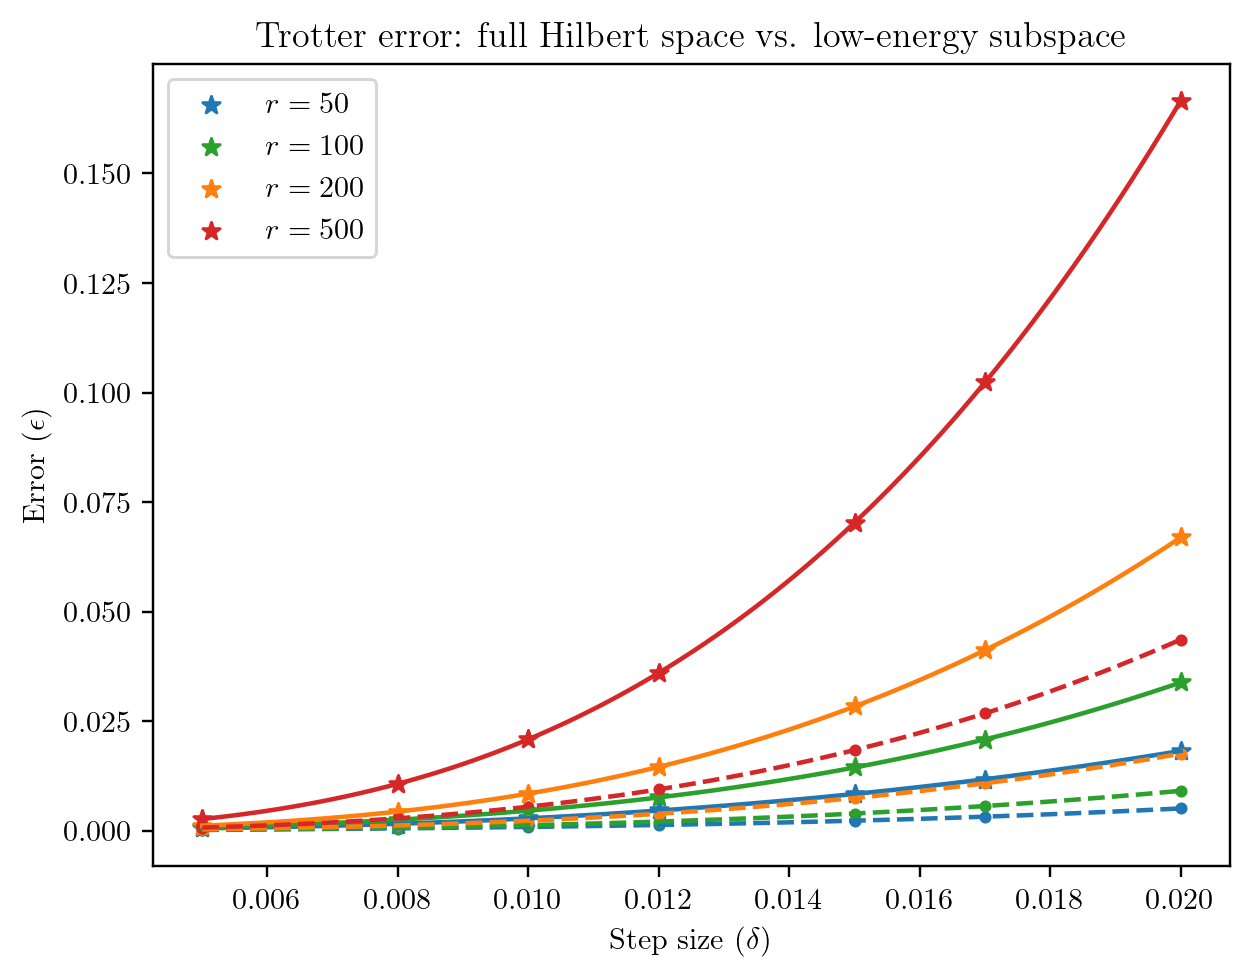

In [30]:
fig, ax = plt.subplots(dpi=217)
ax.set_title('Trotter error: full Hilbert space vs. low-energy subspace')
ax.set_xlabel('Step size ($\delta$)')
ax.set_ylabel('Error ($\epsilon$)')

ax.scatter(dt, r_50, marker = '*', color = '#1f77b4', label = '$r=50$')
ax.plot(dt_new, poly_r_50(dt_new), color = '#1f77b4', linestyle = '-')

ax.scatter(dt, r_50_Delta_5, marker ='.', color = '#1f77b4')
ax.plot(dt_new, poly_r_50_Delta_5(dt_new), color = '#1f77b4', linestyle = '--')

ax.scatter(dt, r_100, marker = '*', color = '#2ca02c', label = '$r=100$')
ax.plot(dt_new, poly_r_100(dt_new), color = '#2ca02c', linestyle = '-')

ax.scatter(dt, r_100_Delta_5, marker ='.', color = '#2ca02c')
ax.plot(dt_new, poly_r_100_Delta_5(dt_new), color = '#2ca02c', linestyle = '--')

ax.scatter(dt, r_200, marker = '*', color = '#ff7f0e', label = '$r=200$')
ax.plot(dt_new, poly_r_200(dt_new), color = '#ff7f0e', linestyle = '-')

ax.scatter(dt, r_200_Delta_5, marker ='.', color = '#ff7f0e')
ax.plot(dt_new, poly_r_200_Delta_5(dt_new), color = '#ff7f0e', linestyle = '--')

ax.scatter(dt, r_500, marker = '*', color = '#d62728', label = '$r=500$')
ax.plot(dt_new, poly_r_500(dt_new), color = '#d62728', linestyle = '-')

ax.scatter(dt, r_500_Delta_5, marker ='.', color = '#d62728')
ax.plot(dt_new, poly_r_500_Delta_5(dt_new), color = '#d62728', linestyle = '--')
ax.legend()

fig.savefig('baseline.svg', dpi=600, format='svg')

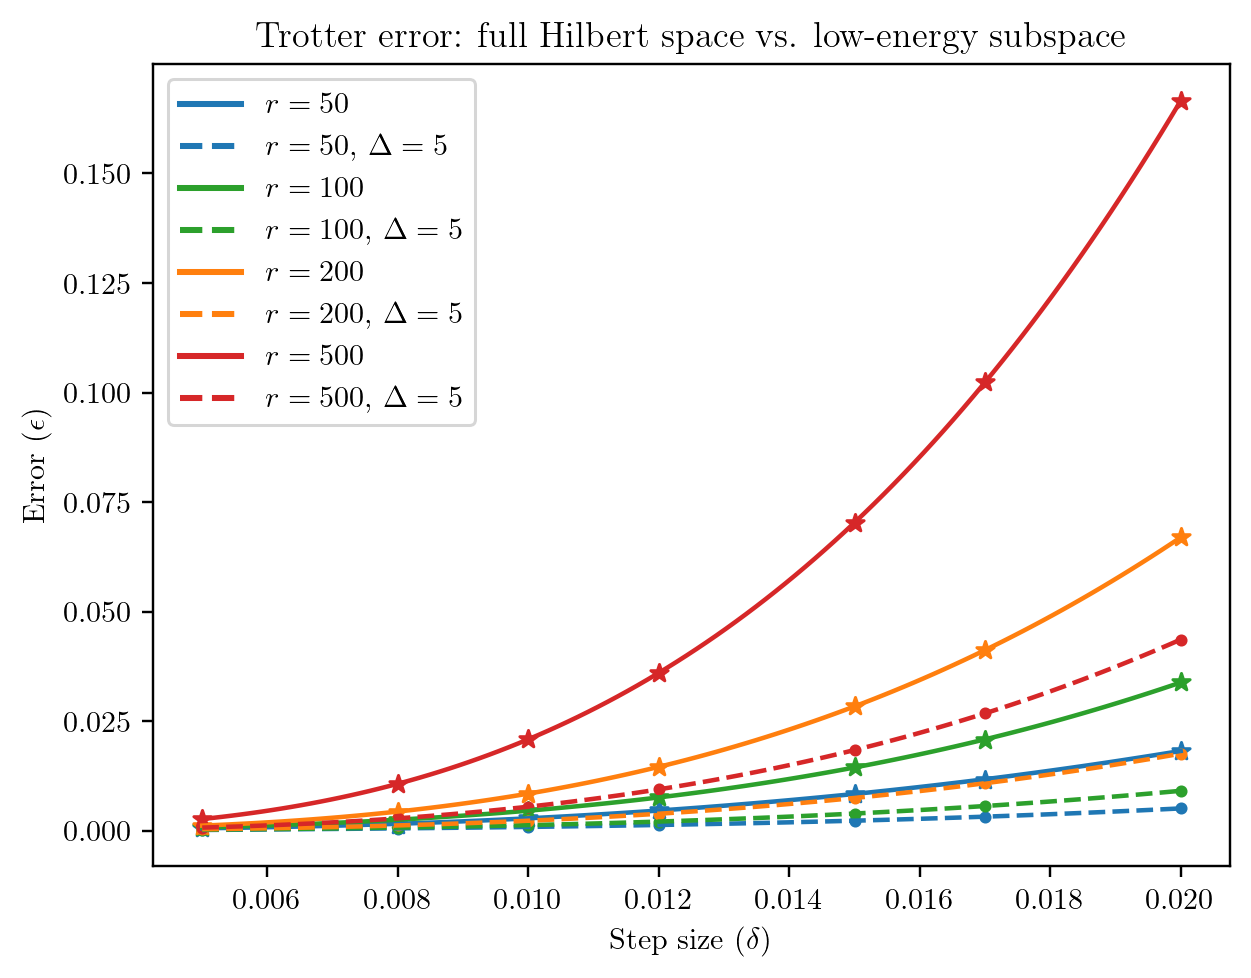

In [32]:
fig, ax = plt.subplots(dpi=217)
ax.set_title('Trotter error: full Hilbert space vs. low-energy subspace')
ax.set_xlabel('Step size ($\delta$)')
ax.set_ylabel('Error ($\epsilon$)')

ax.scatter(dt, r_50, marker = '*', color = '#1f77b4')
ax.plot(dt_new, poly_r_50(dt_new), color = '#1f77b4', linestyle = '-', label='$r=50$')

ax.scatter(dt, r_50_Delta_5, marker ='.', color = '#1f77b4')
ax.plot(dt_new, poly_r_50_Delta_5(dt_new), color = '#1f77b4', linestyle = '--', label='$r=50$, $\Delta = 5$')

ax.scatter(dt, r_100, marker = '*', color = '#2ca02c')
ax.plot(dt_new, poly_r_100(dt_new), color = '#2ca02c', linestyle = '-', label='$r=100$')

ax.scatter(dt, r_100_Delta_5, marker ='.', color = '#2ca02c')
ax.plot(dt_new, poly_r_100_Delta_5(dt_new), color = '#2ca02c', linestyle = '--', label='$r=100$, $\Delta = 5$')

ax.scatter(dt, r_200, marker = '*', color = '#ff7f0e')
ax.plot(dt_new, poly_r_200(dt_new), color = '#ff7f0e', linestyle = '-', label='$r=200$')

ax.scatter(dt, r_200_Delta_5, marker ='.', color = '#ff7f0e')
ax.plot(dt_new, poly_r_200_Delta_5(dt_new), color = '#ff7f0e', linestyle = '--', label='$r=200$, $\Delta = 5$')

ax.scatter(dt, r_500, marker = '*', color = '#d62728')
ax.plot(dt_new, poly_r_500(dt_new), color = '#d62728', linestyle = '-', label='$r=500$')

ax.scatter(dt, r_500_Delta_5, marker ='.', color = '#d62728')
ax.plot(dt_new, poly_r_500_Delta_5(dt_new), color = '#d62728', linestyle = '--', label='$r=500$, $\Delta = 5$')
ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})

fig.savefig('baseline.svg', dpi=600, format='svg')

In [26]:
t_1 = np.log(np.array(loadmat('../qDRIFT/t_1.mat')['t_1'].flatten()))/np.log(10)
t_1_Delta_5 = np.log(np.array(loadmat('../qDRIFT/t_1_Delta_5.mat')['t_1_Delta_5'].flatten()))/np.log(10)
t_3 = np.log(np.array(loadmat('t_3.mat')['t_3'].flatten()))/np.log(10)
t_3_Delta_5 = np.log(np.array(loadmat('t_3_Delta_5.mat')['t_3_Delta_5'].flatten()))/np.log(10)
t_5 = np.log(np.array(loadmat('t_5.mat')['t_5'].flatten()))/np.log(10)
t_5_Delta_5 = np.log(np.array(loadmat('t_5_Delta_5.mat')['t_5_Delta_5'].flatten()))/np.log(10)
t_10 = np.log(np.array(loadmat('t_10.mat')['t_10'].flatten()))/np.log(10)
t_10_Delta_5 = np.log(np.array(loadmat('t_10_Delta_5.mat')['t_10_Delta_5'].flatten()))/np.log(10)

step = np.log(np.array([1000, 10000, 100000, 200000, 500000, 1000000]))/np.log(10)
step_new = np.linspace(min(step), max(step), 100)

# 多项式拟合
coefficients_t_1 = np.polyfit(step, t_1, 1) 
poly_t_1 = np.poly1d(coefficients_t_1)
coefficients_t_1_Delta_5 = np.polyfit(step, t_1_Delta_5, 1) 
poly_t_1_Delta_5 = np.poly1d(coefficients_t_1_Delta_5)

coefficients_t_3 = np.polyfit(step, t_3, 1)  
poly_t_3 = np.poly1d(coefficients_t_3)
coefficients_t_3_Delta_5 = np.polyfit(step, t_3_Delta_5, 1)  
poly_t_3_Delta_5 = np.poly1d(coefficients_t_3_Delta_5)

coefficients_t_5 = np.polyfit(step, t_5, 1) 
poly_t_5 = np.poly1d(coefficients_t_5)
coefficients_t_5_Delta_5 = np.polyfit(step, t_5_Delta_5, 1) 
poly_t_5_Delta_5 = np.poly1d(coefficients_t_5_Delta_5)

coefficients_t_10 = np.polyfit(step, t_10, 1) 
poly_t_10 = np.poly1d(coefficients_t_10)
coefficients_t_10_Delta_5 = np.polyfit(step, t_10_Delta_5, 1)  
poly_t_10_Delta_5 = np.poly1d(coefficients_t_10_Delta_5)

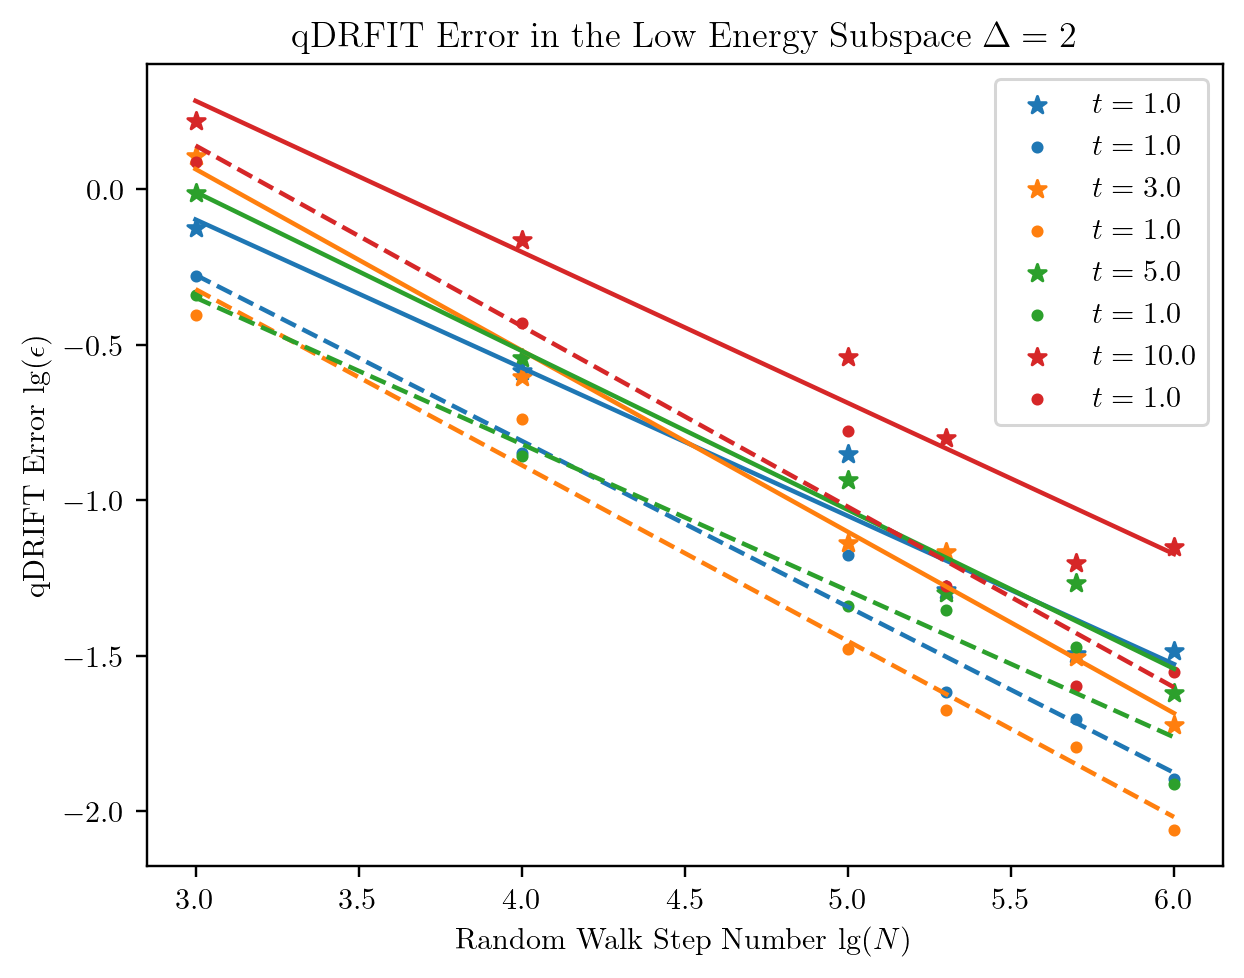

In [20]:
fig, ax = plt.subplots(dpi=217)
ax.set_title('qDRFIT Error in the Low Energy Subspace $\Delta = 2$')
ax.set_xlabel('Random Walk Step Number $\lg(N)$')
ax.set_ylabel('qDRIFT Error $\lg(\epsilon)$')

ax.scatter(step, t_1, marker = '*', color = '#1f77b4', label='$t=1.0$')
ax.plot(step_new, poly_t_1(step_new), color = '#1f77b4', linestyle = '-')

ax.scatter(step, t_1_Delta_5, marker ='.', color = '#1f77b4', label='$t=1.0$')
ax.plot(step_new, poly_t_1_Delta_5(step_new), color = '#1f77b4', linestyle = '--')

ax.scatter(step, t_3, marker = '*', color = '#ff7f0e', label='$t=3.0$')
ax.plot(step_new, poly_t_3(step_new), color = '#ff7f0e', linestyle = '-')

ax.scatter(step, t_3_Delta_5, marker ='.', color = '#ff7f0e', label='$t=1.0$')
ax.plot(step_new, poly_t_3_Delta_5(step_new), color = '#ff7f0e', linestyle = '--')

ax.scatter(step, t_5, marker = '*', color = '#2ca02c', label='$t=5.0$')
ax.plot(step_new, poly_t_5(step_new), color = '#2ca02c', linestyle = '-')

ax.scatter(step, t_5_Delta_5, marker ='.', color = '#2ca02c', label='$t=1.0$')
ax.plot(step_new, poly_t_5_Delta_5(step_new), color = '#2ca02c', linestyle = '--')

ax.scatter(step, t_10, marker = '*', color = '#d62728', label='$t=10.0$')
ax.plot(step_new, poly_t_10(step_new), color = '#d62728', linestyle = '-')

ax.scatter(step, t_10_Delta_5, marker ='.', color = '#d62728', label='$t=1.0$')
ax.plot(step_new, poly_t_10_Delta_5(step_new), color = '#d62728', linestyle = '--')
ax.legend()

In [66]:
test = np.array(loadmat('../qDRIFT/error_raw.mat')['qDRIFT_Error_10']).flatten()
test

array([[ 0.26248945+0.03636864j,  0.        +0.j        ,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        , -0.18634354-0.2424197j ],
       [ 0.        +0.j        ,  0.16273575+0.06718024j,
         0.05817079-0.03285742j, ..., -0.15542266-0.08050765j,
        -0.11848982+0.00375201j,  0.        +0.j        ],
       [ 0.        +0.j        , -0.00834352-0.12810544j,
         0.10341219+0.08034441j, ..., -0.06702064-0.09870536j,
        -0.06812236+0.01146444j,  0.        +0.j        ],
       ...,
       [ 0.        +0.j        , -0.06812236+0.01146444j,
        -0.06702064-0.09870536j, ...,  0.10341219+0.08034441j,
        -0.00834352-0.12810544j,  0.        +0.j        ],
       [ 0.        +0.j        , -0.11848982+0.00375201j,
        -0.15542266-0.08050765j, ...,  0.05817079-0.03285742j,
         0.16273575+0.06718024j,  0.        +0.j        ],
       [-0.18634354-0.2424197j ,  0.        +0.j        ,
         0.        +0.j       